In [3]:
import numpy as np

In [4]:
%pip install transformers==4.37.2

In [5]:
import pandas as pd

root_path = '/content/output.csv'

df = pd.read_csv(root_path)
df.head()

,emotion,message
0,surprise,আল্লাও তো তার ঘর মসজিদকে রক্ষা করতে পারে না তা...
1,surprise,এভাবে দেবতাদের মাথা কেটে ফেলে দিলো??? আশ্চর্য ...
2,surprise,মুয়াজ্জিন হত্যায় আপ্নার একটা ইস্টাটাস ও দেখলাম...
3,surprise,আপনি কি প্রমান দিতে পারবেন আপনার টা সঠিক।
4,surprise,ইমরান ভাই অাপনি যদি মুসলমান হতেন তাহলে অাপনি ম...


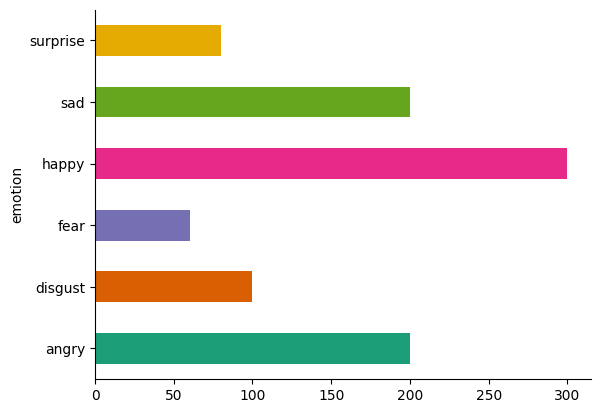

In [5]:
# @title emotion

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
df['count'] = df['message'].apply(lambda x: len(x.split()))

In [7]:
df['encoded_text'] = df['emotion'].astype('category').cat.codes

df.head(10)

,emotion,message,count,encoded_text
0,surprise,আল্লাও তো তার ঘর মসজিদকে রক্ষা করতে পারে না তা...,13,5
1,surprise,এভাবে দেবতাদের মাথা কেটে ফেলে দিলো??? আশ্চর্য ...,20,5
2,surprise,মুয়াজ্জিন হত্যায় আপ্নার একটা ইস্টাটাস ও দেখলাম...,11,5
3,surprise,আপনি কি প্রমান দিতে পারবেন আপনার টা সঠিক।,8,5
4,surprise,ইমরান ভাই অাপনি যদি মুসলমান হতেন তাহলে অাপনি ম...,15,5
5,surprise,আমার মনে হয় প্রতিমা গুলো ভেঙেছে মালাউন রাই দেশ...,18,5
6,surprise,ইমরান বুঝে নিও।।। কোন এক দিন শুনতে পাব তোমারও ...,15,5
7,surprise,এখন কোথায় হেফাজত ইসলাম এর সেই নেতা?যে বলে সংখা...,11,5
8,surprise,আপনার সবাই গালি দেয় কেন?,5,5
9,surprise,এরা তো নিজেদেরকেই রক্ষা করতে পারে না। তবে তাদে...,13,5


In [8]:
!pip install bangla-stemmer

In [9]:
from bangla_stemmer.stemmer import stemmer

stmr = stemmer.BanglaStemmer()

valid_bangla_char = set(['া','ি','ী','ু','ূ','ৃ','ে','ৈ','ো','ৌ','ক','খ',
'গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন',
'প','ফ','ব','ভ','ম','য','র','ল','শ','ষ','স','হ','ড়','ঢ়','য়','ৎ','ং','ঃ'
'‍ঁ','‍্','‍্য','‍‍্র','‍‍র্ক','‍্ব','৺','ক্ষ','জ্ঞ','অ','আ','ই','ঈ','উ','ঊ','ঋ','এ',
'ঐ','ও','ঔ','অ্যা','্','য়','ঁ','ড়','়','ঃ'])

stop_words = set([''])
stop_words_file_lines=open('/content/stop_words.txt','r',encoding='utf-8-sig').readlines()
for word in stop_words_file_lines:
    stop_words.add(word.strip())

def puncuation_removal(sentence):
    words = sentence.split()
    unique_words_per_sentence = []
    for every_word in words:
        correct_word = ''
        for each_char in every_word:
            if each_char in valid_bangla_char:
                correct_word += each_char
            else:
                correct_word = ''
        if correct_word not in stop_words:
            unique_words_per_sentence.append(correct_word.strip())
        correct_word = ''

    new_refined_sentence = ' '.join(stmr.stem(unique_words_per_sentence))

    return new_refined_sentence

df["text_clean"] = df["message"].apply(lambda x: puncuation_removal(x))
df.head()

applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied third rules..
applied second rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied f

,emotion,message,count,encoded_text,text_clean
0,surprise,আল্লাও তো তার ঘর মসজিদকে রক্ষা করতে পারে না তা...,13,5,আল্লা ঘর মসজিদ রক্ষা আল্লা
1,surprise,এভাবে দেবতাদের মাথা কেটে ফেলে দিলো??? আশ্চর্য ...,20,5,এভাবে দেবতা মাথা কাট ফাল আশ্চর্য দেবতা নিজে রক...
2,surprise,মুয়াজ্জিন হত্যায় আপ্নার একটা ইস্টাটাস ও দেখলাম...,11,5,মুয়াজ্জিন হত্যায় আপ্ন এক ইস্টাটাস অত হায়রে
3,surprise,আপনি কি প্রমান দিতে পারবেন আপনার টা সঠিক।,8,5,প্রমান পার টা
4,surprise,ইমরান ভাই অাপনি যদি মুসলমান হতেন তাহলে অাপনি ম...,15,5,ইমরান ভাই অাপনি মুসলমান হত অাপনি মোয়াজ্জ হত্য ...


In [10]:
df.head(20)

,emotion,message,count,encoded_text,text_clean
0,surprise,আল্লাও তো তার ঘর মসজিদকে রক্ষা করতে পারে না তা...,13,5,আল্লা ঘর মসজিদ রক্ষা আল্লা
1,surprise,এভাবে দেবতাদের মাথা কেটে ফেলে দিলো??? আশ্চর্য ...,20,5,এভাবে দেবতা মাথা কাট ফাল আশ্চর্য দেবতা নিজে রক...
2,surprise,মুয়াজ্জিন হত্যায় আপ্নার একটা ইস্টাটাস ও দেখলাম...,11,5,মুয়াজ্জিন হত্যায় আপ্ন এক ইস্টাটাস অত হায়রে
3,surprise,আপনি কি প্রমান দিতে পারবেন আপনার টা সঠিক।,8,5,প্রমান পার টা
4,surprise,ইমরান ভাই অাপনি যদি মুসলমান হতেন তাহলে অাপনি ম...,15,5,ইমরান ভাই অাপনি মুসলমান হত অাপনি মোয়াজ্জ হত্য ...
5,surprise,আমার মনে হয় প্রতিমা গুলো ভেঙেছে মালাউন রাই দেশ...,18,5,প্রতিমা গুলো ভাঙ মালাউন রাই দেশ অস্থির কনো মুস...
6,surprise,ইমরান বুঝে নিও।।। কোন এক দিন শুনতে পাব তোমারও ...,15,5,ইমরান বুঝে এক শুন পাব তোম গাড়ে মাথা মুর্তি মত
7,surprise,এখন কোথায় হেফাজত ইসলাম এর সেই নেতা?যে বলে সংখা...,11,5,কোথায় হেফাজত ইস সংখালঘু নিরাপদে
8,surprise,আপনার সবাই গালি দেয় কেন?,5,5,সবা গালি দেয়
9,surprise,এরা তো নিজেদেরকেই রক্ষা করতে পারে না। তবে তাদে...,13,5,নিজেদেরকে রক্ষা সৃষ্ কিভাবে রক্ষা


In [11]:
category_count = df['emotion'].value_counts()

categories = category_count.index

categories

Index(['happy', 'angry', 'sad', 'disgust', 'surprise', 'fear'], dtype='object')

In [12]:
category_count

happy       300
angry       200
sad         200
disgust     100
surprise     80
fear         60
Name: emotion, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# df = data[['text_clean', 'Label']]

# Y = pd.get_dummies(data['category']).values
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['encoded_text'], random_state=42, stratify=df['encoded_text'])
print(np.unique(y_train))

y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

[0 1 2 3 4 5]


In [14]:
y_train

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [15]:
from transformers import BertModel, BertTokenizer, TFBertModel

bert_model_name = "sagorsarker/bangla-bert-base"
bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = TFBertModel.from_pretrained(bert_model_name)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

print(tf.config.list_physical_devices('GPU'))

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='input_ids')
attention_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name='attention_mask')

inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

outputs = bert_model(inputs)

pooled_output = outputs.pooler_output
pooled_output = Dropout(0.9)(pooled_output)

hidden_layer = Dense(64, activation='relu')(pooled_output)
hidden_layer = Dropout(0.7)(hidden_layer)

num_classes = 6
classification_layer = tf.keras.layers.Dense(num_classes, activation='softmax')(pooled_output)

# Define model inputs and outputs
inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}
outputs = {'classification': classification_layer}

# Define model
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)

[]


In [21]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=METRICS)

In [22]:
# model.fit(X_train, y_train, epochs=2)
train_encodings = bert_tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')
# train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=2)

history = model.fit(
    x=(train_encodings['input_ids'], train_encodings['attention_mask']),
    y=y_train,
    epochs=2,
    batch_size=32
)

Epoch 1/2
23/23 [==============================] - 957s 40s/step - loss: 4.0197 - accuracy: 0.7506 - precision: 0.2003 - recall: 0.1660
Epoch 2/2
23/23 [==============================] - 916s 40s/step - loss: 3.6941 - accuracy: 0.7570 - precision: 0.2322 - recall: 0.1986


In [23]:
model.save('/content/BERT.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
# Define the custom object scope
custom_objects = {'TFBertModel': TFBertModel}

# Load the model using the custom object scope
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model('/content/BERT.h5')


test_encodings = bert_tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')

# Get the predicted labels for the test data
yy_pred = model.predict(x=(test_encodings['input_ids'], test_encodings['attention_mask']))
y_pred = np.argmax(yy_pred['classification'], axis=1)# y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

8/8 [==============================] - 47s 5s/step
[[ 0  0  0  0 50  0]
 [ 0  0  0  0 25  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0 75  0]
 [ 0  0  0  0 50  0]
 [ 0  0  0  0 20  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        75
           4       0.21      1.00      0.35        50
           5       0.00      0.00      0.00        20

    accuracy                           0.21       235
   macro avg       0.04      0.17      0.06       235
weighted avg       0.05      0.21      0.07       235



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
test_encodings['input_ids']
test_encodings['attention_mask']

<tf.Tensor: shape=(235, 62), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer, TFBertModel

# Load the BERT tokenizer
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Sample text for testing
sample_text = "This is a test sentence to see how the model performs."

# Encode the sample text using the BERT tokenizer
sample_encoding = bert_tokenizer(sample_text, padding=True, truncation=True, max_length=128, return_tensors='tf')

# Get the predicted label for the sample text
sample_prediction = model.predict(x=(sample_encoding['input_ids'], sample_encoding['attention_mask']))
sample_pred_label = np.argmax(sample_prediction['classification'], axis=1)

# Print the predicted label
print("Predicted Label:", sample_pred_label)
